In [1]:
import tensorflow as tf
from utils import *


In [2]:
train_ds, valid_ds = load_dataset_tensorflow(subset="both",validation_split=0.2)

Found 1650 files belonging to 5 classes.
Using 1320 files for training.
Using 330 files for validation.


In [3]:
def get_base_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Rescaling(1./255))
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D())
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(5, activation='softmax'))
    return model


In [4]:
model = get_base_model()
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])
history = model.fit(train_ds, validation_data=valid_ds, epochs=2)

Epoch 1/2
42/42 ━━━━━━━━━━━━━━━━━━━━ 35s 760ms/step - accuracy: 0.2587 - loss: 37.1035 - val_accuracy: 0.3364 - val_loss: 1.9156
Epoch 2/2
42/42 ━━━━━━━━━━━━━━━━━━━━ 24s 559ms/step - accuracy: 0.3076 - loss: 4.6280 - val_accuracy: 0.2333 - val_loss: 2.2196


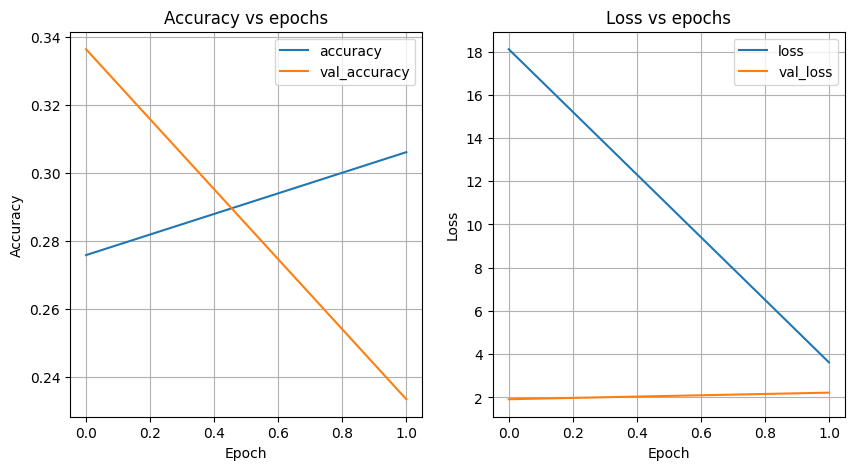

In [5]:
plot_accuraccy_loss(history)